In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
from tqdm.notebook import tqdm
from PIL import Image
import requests
import urllib
from io import BytesIO

from sklearn.metrics.pairwise import euclidean_distances

import keras,os
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump

pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>Using VGG pre trained model to extract features</h1>
<ol>
  <li>Create model_cnn method to return VGG16 model</li>
  <li>Create feature extraction model to get features from images</li>
  <li>Create model_cnn method to return VGG16 model</li>


In [ ]:
#Loading the data
data = pd.read_pickle('G:\Jupyter Notebook\Amazon recommendor\\pickles\\47k_apparel_data')

In [ ]:
#This will return a pre trained Vgg 16 model
#We will remove the last prediction layer
#When an image is sent to this will give 4096 features

def model_cnn():
    
    model = VGG16()
    # remove the output layer
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    
    return model

In [ ]:
#When an image is sent to this will give 4096 features
#The ids variable will contain the ID of those row which has invalid image URL
#The features variable will contain the 4096 feature of each images


#The data variable is the dataframe, model is the type of model which are using to extract features
#The start and end are used to control the amount of feature extraction done in one go

def feature_extraction(data,model,start,end):
    counter = -1
    features = []
    ids = []
    urls = data.iloc[:,4].tolist()[start:end]
    
    for url in tqdm(urls):
        
        try:
            counter = counter+1
            
            response = requests.get(url,timeout=5)

            img = Image.open(BytesIO(response.content))

            img = img.resize((224,224), Image.ANTIALIAS)

            img = np.array(img)

            img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])

            img = preprocess_input(img)

            features.append(model.predict(img)[0])
            
        except:
            
            ids.append(counter)
            
        
    return features, ids    

In [ ]:
feature, ids = feature_extraction(data,model_cnn(),0,2000)
feature1, ids1 = feature_extraction(data,model_cnn(),2000,4000)
feature2, ids2 = feature_extraction(data,model_cnn(),4000,8000)
feature4, ids4 = feature_extraction(data,model_cnn(),10000,12000)
feature5, ids5 = feature_extraction(data,model_cnn(),12000,20000)
feature6, ids6 = feature_extraction(data,model_cnn(),20000,47000)
feature7, ids7 = feature_extraction(data,model_cnn(),47000,47486)

In [ ]:
#The savelist method is used to save the features in .npy format
#We will use loadList method to load the .npy method

def saveList(myList,filename):
    # the filename should mention the extension 'npy'
    np.save(filename,myList)
    print("Saved successfully!")


def loadList(filename):
    # the filename should mention the extension 'npy'
    tempNumpyArray=np.load(filename)
    return tempNumpyArray.tolist()

In [ ]:
#Saving all the features in .npy format

saveList(feature,'features.npy')
saveList(ids,'ids.npy')

saveList(feature1,'features1.npy')
saveList(ids1,'ids1.npy')

saveList(feature2,'features2.npy')
saveList(ids2,'ids2.npy')

saveList(feature3,'features3.npy')
saveList(ids3,'ids3.npy')

saveList(feature4,'features4.npy')
saveList(ids4,'ids4.npy')

saveList(feature5,'features5.npy')
saveList(ids5,'ids5.npy')

saveList(feature6,'features6.npy')
saveList(ids6,'ids6.npy')

saveList(feature7,'features7.npy')
saveList(ids7,'ids7.npy')

Saved successfully!


<h2>Data Cleaning</h2>

1. Removing all the data which has invalid URL

In [ ]:
#All the invalid URL id are stored in the ids.npy file

In [ ]:
#The ids.npy contains id from 0-1999
#The ids1.npy contains id from 2000-3999
#The ids2.npy contains id from 4000-7999
#The ids3.npy contains id from 8000-9999
#The ids4.npy contains id from 10000-11999
#The ids5.npy contains id from 12000-19999
#The ids6.npy contains id from 20000-46999
#The ids7.npy contains id from 47000-47486

In [ ]:
#Loading all the ids_X.npy files

ids_ = loadList('Failed\CNN model\\ids.npy')
ids_1 = loadList('Failed\CNN model\\ids1.npy')
ids_2 = loadList('Failed\CNN model\\ids2.npy')
ids_3 = loadList('Failed\CNN model\\ids3.npy')
ids_4 = loadList('Failed\CNN model\\ids4.npy')
ids_5 = loadList('Failed\CNN model\\ids5.npy')
ids_6 = loadList('Failed\CNN model\\ids6.npy')
ids_7 = loadList('Failed\CNN model\\ids7.npy')

In [ ]:
#the total number of URL that are invalid
len(ids_)+len(ids_1)+len(ids_2)+len(ids_3)+len(ids_4)+len(ids_5)+len(ids_6)+len(ids_7)

971

In [ ]:
#The features.npy contains id from 0-1999
#The features1.npy contains id from 2000-3999
#The features2.npy contains id from 4000-7999
#The features3.npy contains id from 8000-9999
#The features4.npy contains id from 10000-11999
#The features5.npy contains id from 12000-19999
#The features6.npy contains id from 20000-46999
#The features7.npy contains id from 47000-47486

In [ ]:
features_ = loadList('Failed\CNN model\\features.npy')
features_1 = loadList('Failed\CNN model\\features1.npy')
features_2 = loadList('Failed\CNN model\\features2.npy')
features_3 = loadList('Failed\CNN model\\features3.npy')
features_4 = loadList('Failed\CNN model\\features4.npy')
features_5 = loadList('Failed\CNN model\\features5.npy')
features_6 = loadList('Failed\CNN model\\features6.npy')
features_7 = loadList('Failed\CNN model\\features7.npy')


In [ ]:
#Checking the total number of rows we have all features.npy files combined
len(features_)+len(features_1)+len(features_2)+len(features_3)+len(features_4)+len(features_5)+len(features_6)+len(features_7)

46515

In [ ]:
#Checking if we have correct number of elemenet in all the .npy files combined
46515+971

#Since the data frame has 47468 rows we are good

47486

In [ ]:
data.shape

(47486, 6)

<h2>Modifying the IDS as per the feature extraction method

In [ ]:
#We are doing this because we have done extraction in splits
ids_1 = [2000+i for i in ids_1]
ids_2 = [4000+i for i in ids_2]
ids_3 = [8000+i for i in ids_3]
ids_4 = [10000+i for i in ids_4]
ids_5 = [12000+i for i in ids_5]
ids_6 = [20000+i for i in ids_6]
ids_7 = [47000+i for i in ids_7]

In [ ]:
#Adding all this ids in one single list, we will use this new list to drop items form our dataset
drop_ids = ids_+ids_1+ids_2+ids_3+ids_4+ids_5+ids_6+ids_7

<h2>Dropping the rows that have invalid URL

In [ ]:
#Dropping the data points that do not have valid URL
data.drop(drop_ids,inplace=True)

#resetting the index of the dataframe
data.reset_index(drop=True,inplace=True)

<h2>Putting all the features in one single list

In [ ]:
extracted_features=features_+features_1+features_2+features_3+features_4+features_5+features_6+features_7

In [ ]:
#Saving the extracted features and dataFrame
data.to_pickle('46k_CNN_data')

In [ ]:
#saving extracted features
saveList(extracted_features,'CNN_features.npy')

Saved successfully!


In [ ]:
#Reading the new DataFrame
data = pd.read_pickle('/content/drive/MyDrive/Amazon/46k_CNN_data')

In [ ]:
#Loading the features of all the images
ext = loadList('/content/drive/MyDrive/Amazon/CNN_features.npy')

In [ ]:
euc_dist = euclidean_distances(np.array(ext[6091]).reshape(1,-1),np.array(ext[:]))

In [ ]:
def display_product(id,euc_dist):
    
    fig,ax = plt.subplots(1,1,figsize=(15,6))

    URL = str(data.iloc[id,4])
  
    response = requests.get(URL)

    img = Image.open(BytesIO(response.content))
    
    print("Title : ",data.iloc[id,5])
    print("ASIN : ",data.iloc[id,0])
    print("Euclidean distance :", euc_dist[0][id])
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
        
    plt.show()

In [ ]:
def top_fashion(id,top=5):
    
    euc_dist = euclidean_distances(np.array(ext[id]).reshape(1,-1),np.array(ext[:]))

    top_product_counter=0
    for i in (np.argsort(euc_dist)[0]):
        display_product(i,euc_dist)
        top_product_counter+=1
        if(top_product_counter>top+1):
            break


<h2>Displaying some top products

Title :  captain america symbol tee women black
ASIN :  B01H6WEWIA
Euclidean distance : 0.0


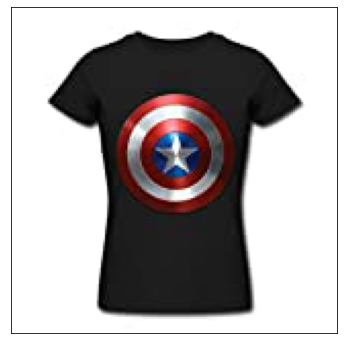

Title :  squirrel eating pine cones fashion shirt for woman
ASIN :  B01K9JP8FS
Euclidean distance : 38.94611437241538


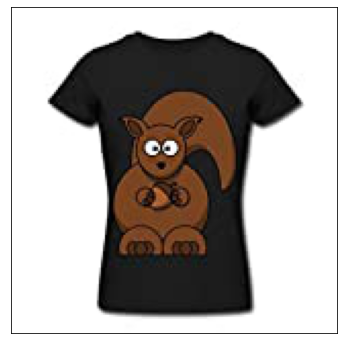

Title :  woman lindsey stirling circular mark shirts black
ASIN :  B01LA45YR8
Euclidean distance : 41.13278154518267


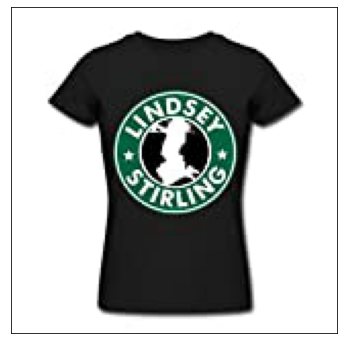

Title :  timico diy sigur ros women shirt black
ASIN :  B01DOYZ530
Euclidean distance : 42.710121797911754


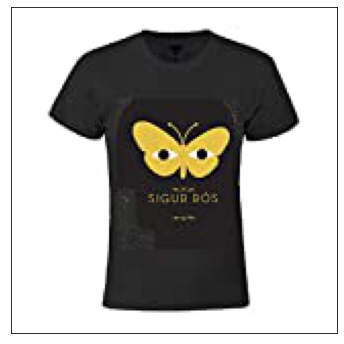

Title :  female golden state logo shirts
ASIN :  B01FRRX7LE
Euclidean distance : 43.2974552869648


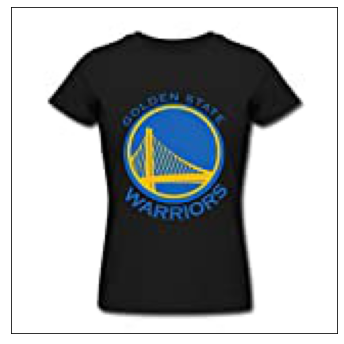

Title :  pure cotton pewdiepie logo women shirt sodasnie
ASIN :  B01LYUGNKF
Euclidean distance : 44.40561521156446


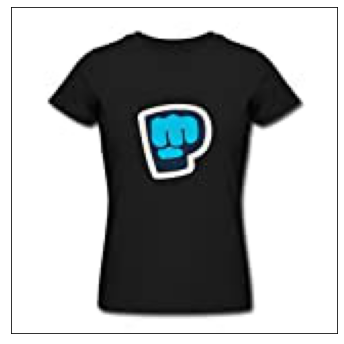

Title :  woman brantley gilbert poster shirts black
ASIN :  B01KLA016G
Euclidean distance : 46.051353638489104


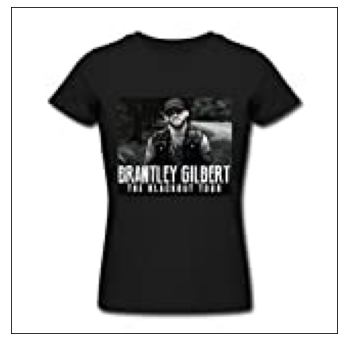

Title :  xiuluan women little red riding hood cool shirt size colorname
ASIN :  B01FWYYL08
Euclidean distance : 46.459794398871225


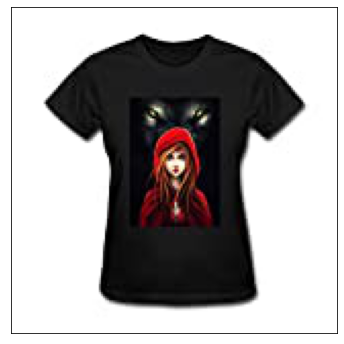

Title :  pitbull symbol logo woman cotton shirt
ASIN :  B01KZ24DRI
Euclidean distance : 46.659220349498405


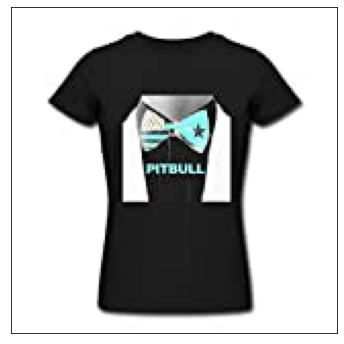

Title :  personalize bling rhinestone green bay next level unisex cvc crew ndk
ASIN :  B019HI211G
Euclidean distance : 46.71944870824053


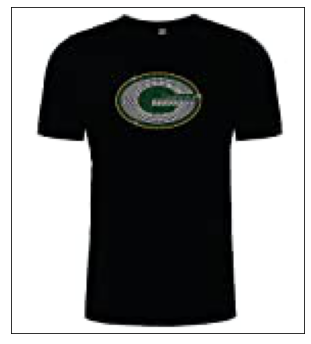

Title :  teacher red glitter apple teach black shirt tees urdoor
ASIN :  B01KG3HM38
Euclidean distance : 46.740975664364605


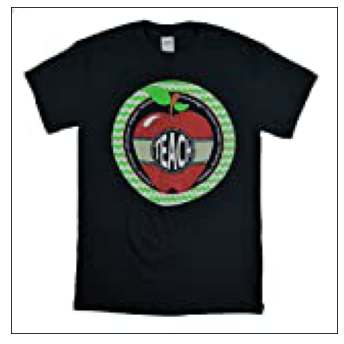

Title :  john cena can me wwe tour woman cotton shirt
ASIN :  B01KSUWMAW
Euclidean distance : 46.75784287470198


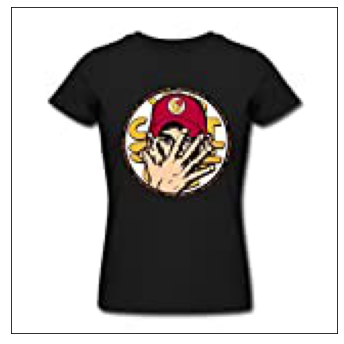

In [ ]:
top_fashion(7030,10)

Title :  captain america shirt distressed shield official womens junior fit navy
ASIN :  B01IQWZ5SK
Euclidean distance : 0.0


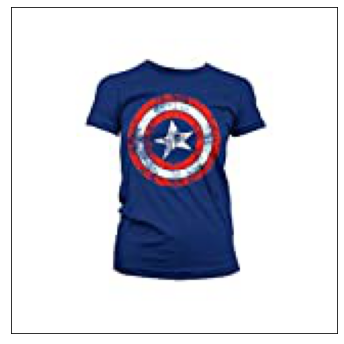

Title :  officially licensed merchandise captain america distressed shield girly shirt navy large
ASIN :  B01BFLL5BA
Euclidean distance : 0.0


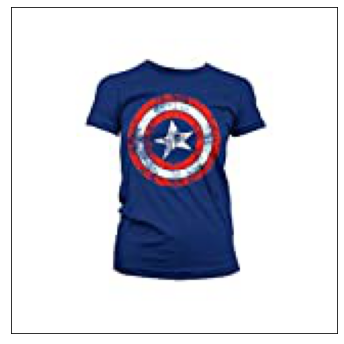

Title :  captain america shirt logo official marvel comics womens junior fit navy
ASIN :  B01IQWW7GS
Euclidean distance : 19.800534702786404


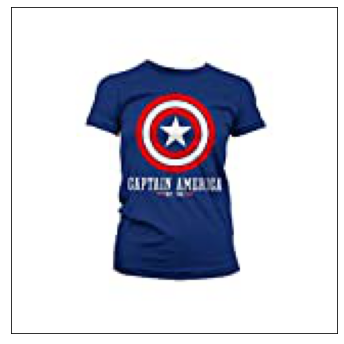

Title :  officially licensed merchandise beverly hills distressed logo girly shirt navy large
ASIN :  B01BFLT43G
Euclidean distance : 20.043776976537238


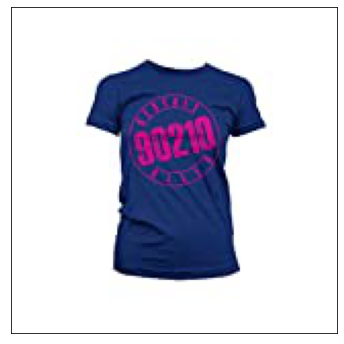

Title :  officially licensed merchandise sloth loves chunk girly shirt black large
ASIN :  B01BFLTY36
Euclidean distance : 27.82822152364365


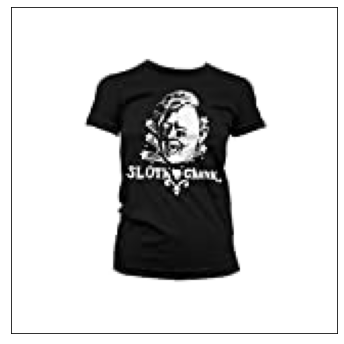

Title :  officially licensed merchandise popeye these guns are loaded girly shirt grey large
ASIN :  B01BFLQYOI
Euclidean distance : 29.301285925129047


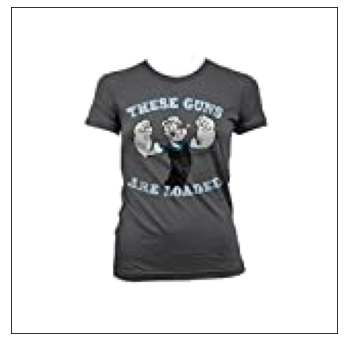

Title :  officially licensed merchandise supergirl athletics dept girly shirt
ASIN :  B0187YL27U
Euclidean distance : 30.94317716218994


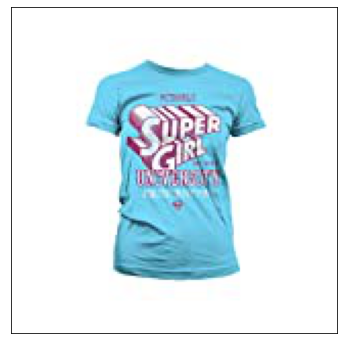

Title :  officially licensed merchandise fun with flags girly tee navy large
ASIN :  B01BFLSWIY
Euclidean distance : 31.33889783232564


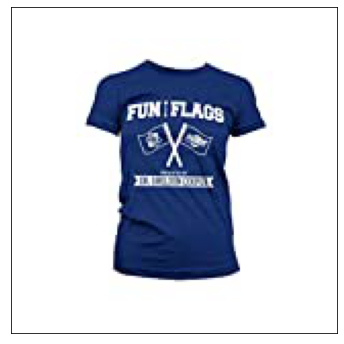

Title :  officially licensed merchandise airwolf chopper distressed girly shirt red large
ASIN :  B01BFLPOGC
Euclidean distance : 31.512872876026258


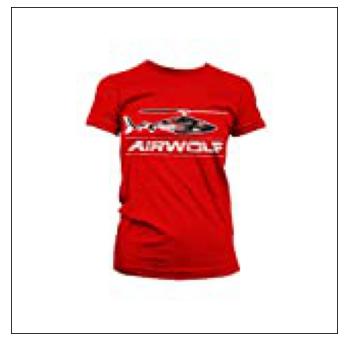

Title :  officially licensed merchandise the flash emblem girly shirt
ASIN :  B0187YHTYA
Euclidean distance : 32.37042247915682


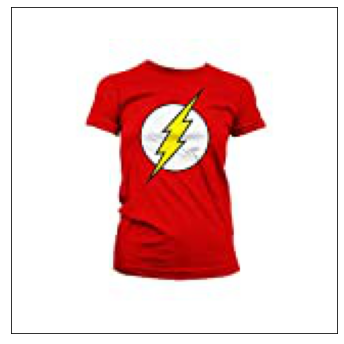

Title :  officially licensed merchandise heisenberg´s desert tours girly shirt black large
ASIN :  B01BFLH712
Euclidean distance : 33.0291841695996


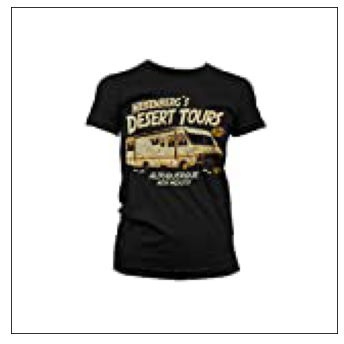

Title :  officially licensed merchandise better call saul logo girly shirt black large
ASIN :  B01BFLF7GO
Euclidean distance : 35.226359745431964


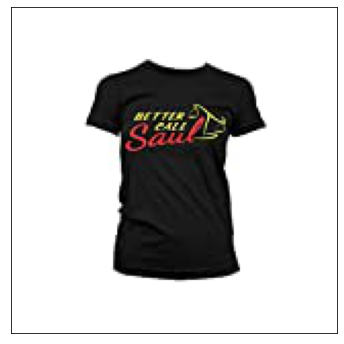

In [ ]:
top_fashion(7031,10)

Title :  burnt umber tiger shirt with zebra stripes xl
ASIN :  B00JXQB7IQ
Euclidean distance : 0.0


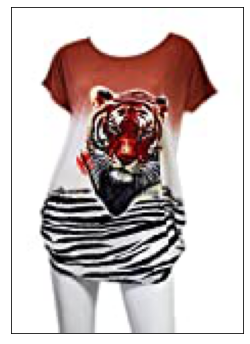

Title :  pink tiger shirt with zebra stripes xl
ASIN :  B00JXQAVN8
Euclidean distance : 44.720069452209295


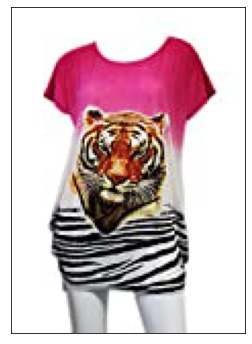

Title :  blue tiger shirt with zebra stripes xl
ASIN :  B00JXQANA4
Euclidean distance : 47.64457171785945


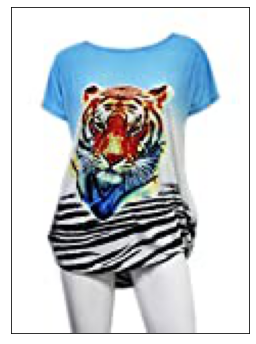

Title :  brown white tiger shirt with tiger stripes xl
ASIN :  B00JXQCZO6
Euclidean distance : 47.96867246542758


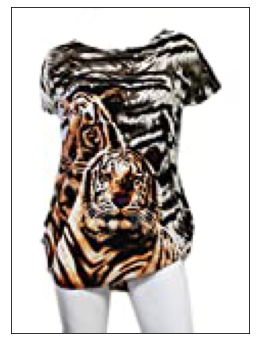

Title :  black white tiger shirt with tiger stripes xl xxl
ASIN :  B00JXQAC2I
Euclidean distance : 48.61662269007337


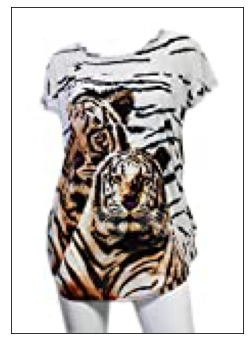

Title :  xhilaration love live wild free burnout tank charcoal fresh white xl
ASIN :  B0722L6GKQ
Euclidean distance : 48.96782496808287


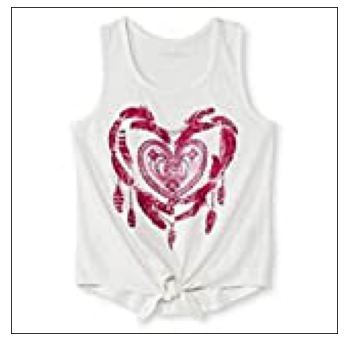

Title :  stretchy large sunglasses face model white tank top
ASIN :  B00CA8A4LA
Euclidean distance : 50.160950082435846


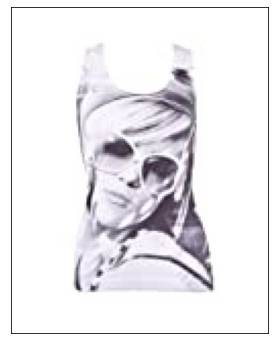

Title :  tempted women sleeveless scoop neck embellished pocket tee black
ASIN :  B071CNCDMP
Euclidean distance : 50.387128397781865


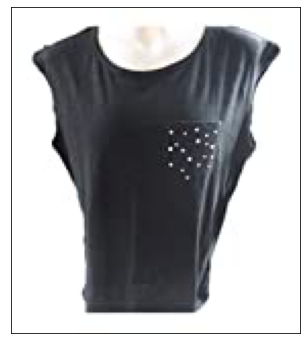

Title :  jadelynn brooke women tank doughs before bros shirt neon pink
ASIN :  B01F5MTO0Y
Euclidean distance : 50.66952542654635


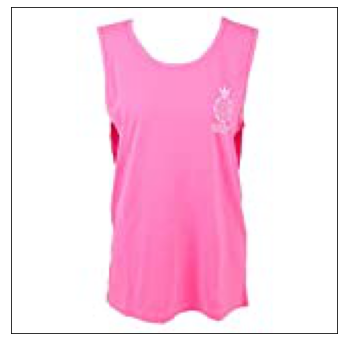

Title :  pastel tank crop tops extra terrestrial print women size
ASIN :  B01IFBZ028
Euclidean distance : 51.30492485505249


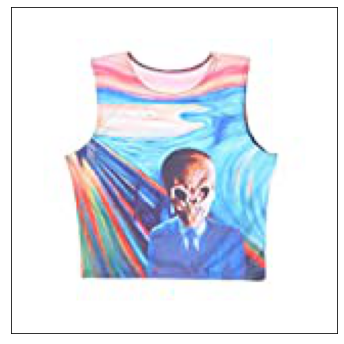

Title :  rockabilly punk rock baby woman white tank top shirt tiki cannibal skull
ASIN :  B00Q6YEFFK
Euclidean distance : 51.47079555903001


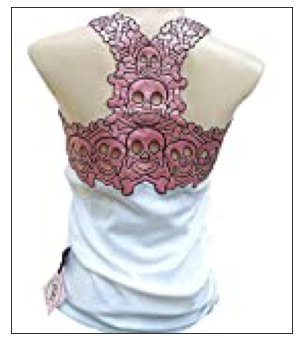

Title :  lover fighter french bulldog sleeveless tshirt the raddest
ASIN :  B0725R85D6
Euclidean distance : 52.222381559752854


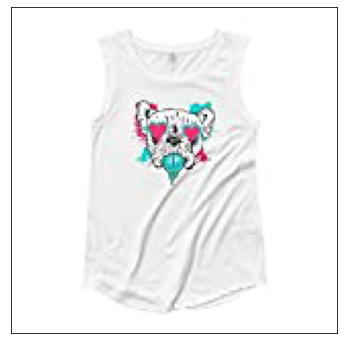

In [ ]:
top_fashion(6091,10)

<h1>Training a CNN model on our own data
<ul>
    <li>We will take 9k SHIRT images and 6k PANT images</li>
    <li>We will create train data with 70% data</li>
    <li>The other remaining data we will use for validation purpose</li>
    

In [ ]:
#selecing 9k data from our dataset
data_shirt = data[data.iloc[:,1]=="SHIRT"].sample(9000)

In [ ]:
#Selecting all the Pant data
data_pant = data[data.iloc[:,1]=="PANT"]

In [ ]:
#Adding data_shirt and data_pant and converting it into one dataframe
df = pd.concat([data_shirt,data_pant])

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
#Splitting data into 70-30
#we will use 70% data for training purpose and 30% data for validation purpose
train, test = train_test_split(df, test_size=0.3)

In [ ]:
def save_image(image_list,path):
    
    counter = 0
    failed=[]
    for url in tqdm(image_list):
        
        try:
            counter = counter+1
            response = requests.get(url,timeout = 5)
            img = Image.open(BytesIO(response.content))

            im1 = img.save(path+"test"+str(counter)+".jpg") 
        except:
            failed.append(url)
    
    return failed        

In [ ]:
path = "Images\TrainingCNN\\Test\\"
image_list = test.iloc[:,4].tolist()

failed = save_image(image_list,path)

In [ ]:
path = "Images\TrainingCNN\\Train\\"
image_list = train.iloc[:,4].tolist()

failed1 = save_image(image_list,path)

In [ ]:
path = "Images\TrainingCNN\\Train\\"
image_list = train.iloc[:,4].tolist()

In [ ]:
saveList(failed,'failed.npy')
saveList(failed1,'failed1.npy')